## pip install matplotlib,numpy,pandas,sklearn,plotly,seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
data=pd.read_csv('salary.csv')
data.head()

,YearsExperience,Salary,age,company_change,type
0,1.1,39343,21,1,junior
1,1.3,46205,31,0,middle
2,1.5,37731,29,1,middle
3,2.0,43525,30,1,middle
4,2.2,39891,27,1,middle


In [3]:
data.drop(['age','company_change','type'],axis=1,inplace=True)

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [7]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


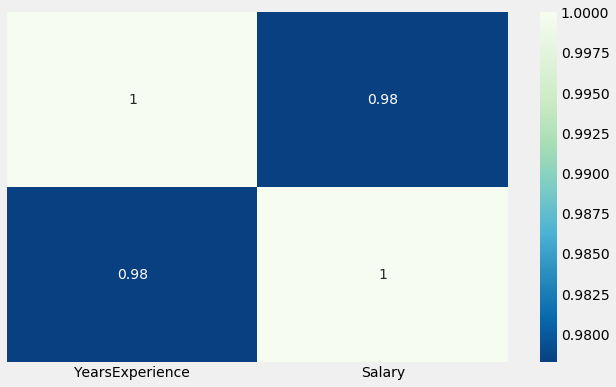

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),yticklabels=False,annot=True,cmap='GnBu_r')

<Figure size 432x432 with 0 Axes>

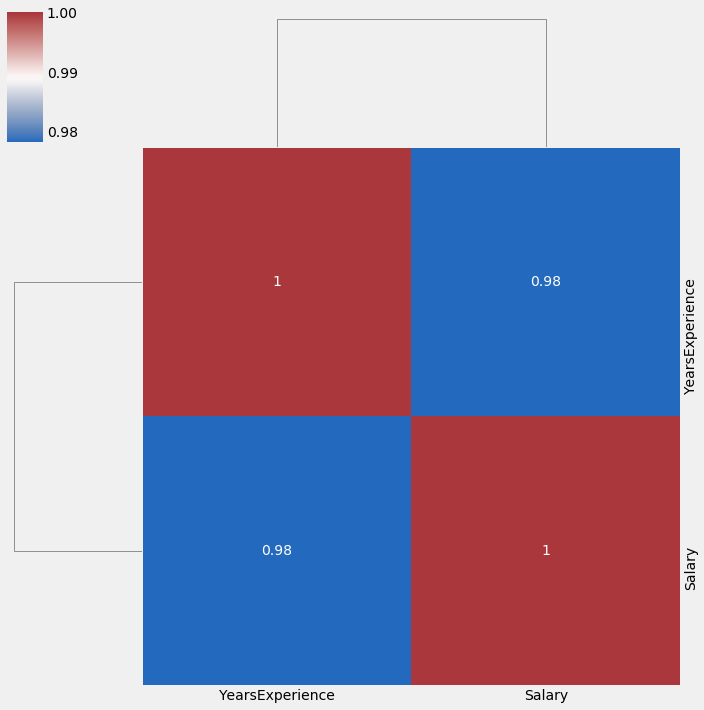

In [10]:
plt.figure(figsize=(6,6))
sns.clustermap(data.corr(),cmap='vlag',annot=True)

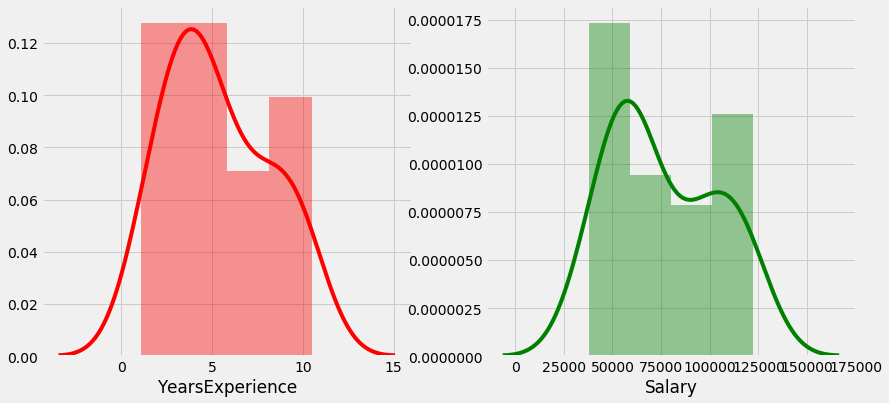

In [11]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.distplot(data['YearsExperience'],color='r')
plt.subplot(122)
sns.distplot(data['Salary'],color='g')

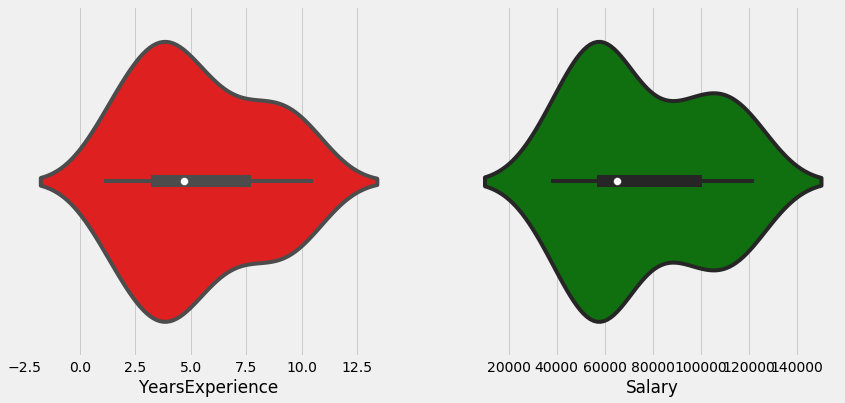

In [12]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.violinplot(data['YearsExperience'],color='r')
plt.subplot(122)
sns.violinplot(data['Salary'],color='g')

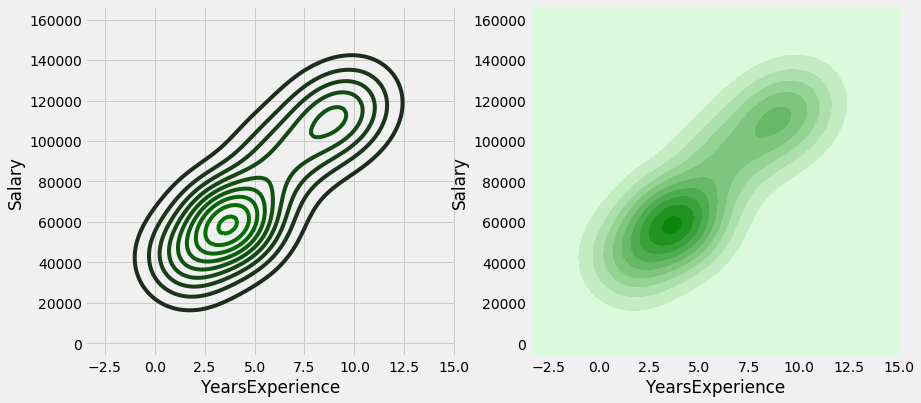

In [13]:
plt.figure(figsize=(13,6))
plt.subplot(121)
sns.kdeplot(data['YearsExperience'],data['Salary'],color='g')
plt.subplot(122)
sns.kdeplot(data['YearsExperience'],data['Salary'],color='g',shade=True)

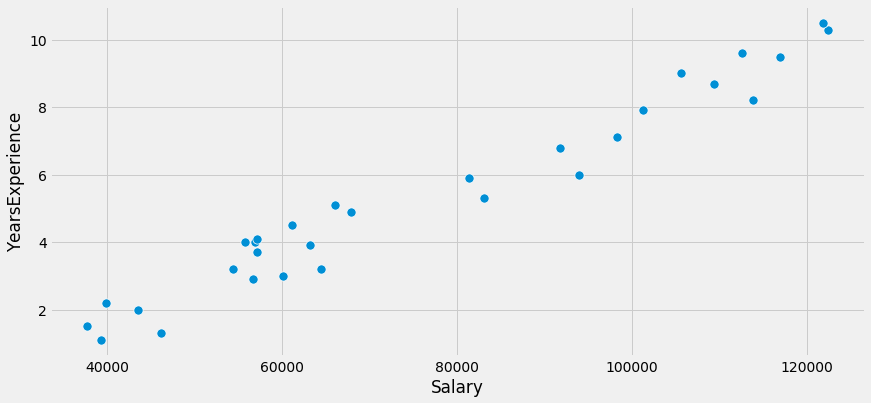

In [14]:
plt.figure(figsize=(13,6))
sns.scatterplot(x='Salary',y='YearsExperience',data=data,s=85)

<Figure size 936x432 with 0 Axes>

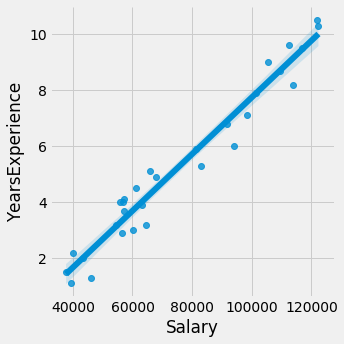

In [15]:
plt.figure(figsize=(13,6))
sns.lmplot(x='Salary',y='YearsExperience',data=data)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x=np.array(data['Salary'])
y=np.array(data['YearsExperience'])

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32)

## $ y=mx+b $
## $ m=\frac{\sum_{i=1}^{n}(x-\bar x)(y-\bar y)}{\sum_{i=1}^{n}(x-\bar x)^2} $
## $ b=\bar y-m\bar x $

In [19]:
a=x_train-x_train.mean()
b=y_train-y_train.mean()
c=sum(a*b)
d=sum(a*a)
m=c/d
b=y_train.mean()-m*x_train.mean()
print(f"slope m is {np.squeeze(m)}")
print(f"intercept is {np.squeeze(b)}")

slope m is 9.89988894644093e-05
intercept is -2.26884764507607


In [20]:
from sklearn.linear_model import LinearRegression

In [22]:
model=LinearRegression()
x_train=x_train.reshape(-1,1)
model.fit(x_train,y_train)
print(f"slope m is {np.squeeze(model.coef_)}")
print(f"intercept is {np.squeeze(model.intercept_)}")

slope m is 9.89988894644093e-05
intercept is -2.26884764507607


In [23]:
y_pred=m*x_test+b

In [24]:
y_test,y_pred

(array([ 1.1,  4.1,  3. ,  4. ,  7.1,  4.9, 10.5,  9. ]),
 array([1.62606566, 3.38210796, 3.68593556, 3.3698321 , 7.46007022,
        4.45693891, 9.79634501, 8.1836531 ]))

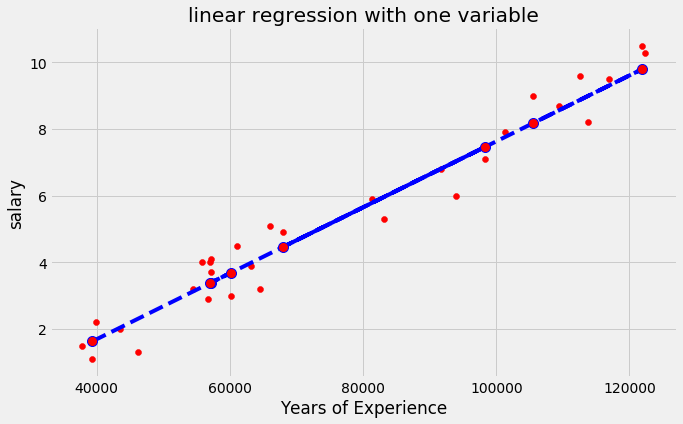

In [25]:
plt.figure(figsize=(10,6))
plt.plot(x_test,y_pred,marker='o',
         color='blue',markerfacecolor='red',
         markersize=10,linestyle='dashed')
plt.scatter(x,y,marker='o',color='red')
plt.xlabel("Years of Experience")
plt.ylabel("salary")
plt.title("linear regression with one variable")
plt.show()

In [26]:
from sklearn.metrics import explained_variance_score

In [27]:
accuracy=explained_variance_score(y_test,y_pred)
accuracy*100

96.04279582812163